## Network Science Lab 1

### Task 1: Barabasi-Albert network

The Barabasi-Albert model for complex networks is based on the idea that networks evolve over time and that new nodes are more likely to link to high-degree nodes. It is (probably) the single-most important model in the field of network science as it reproduces important qualitative features seen in large complex real-world networks.
We will study this model later in the term, and in this task, you will use NetworkX to generate B-A networks and investigate their properties.

1) The B-A model requires two input parameters: the total number of nodes (*N*), and the number of links (*L*)  added between a new node and the existing network upon its introduction. Use the function *nx.barabasi_albert_graph* to generate a B-A graph with *N=500* and *L=4*. Draw your graph (with node_size=6) and zoom into the figure and look around -- do you see any hubs? (Note that the figure will have to open in a separate window for the zoom option to be available)

In [3]:
#Run this cell first
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

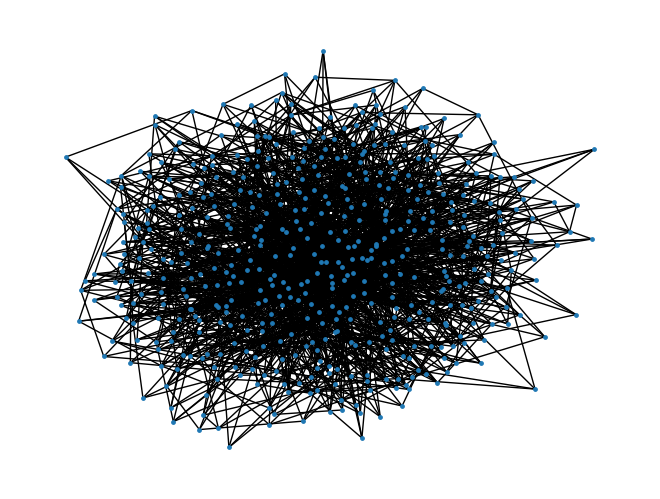

In [5]:
#%matplotlib qt 
#Uncomment the line above to (hopefully) allow interactive figure windows to be created outside of notebook
#Add code here

G = nx.barabasi_albert_graph(500, 4)

nx.draw(G, node_size = 6)

2) Now, generate a B-A graph with *N=5000*, *L=4*, and a $G_{Np}$ graph with *N=5000* and *P=0.002*.
Compute the degree distributions for these graphs and plot them on a log-log plot.

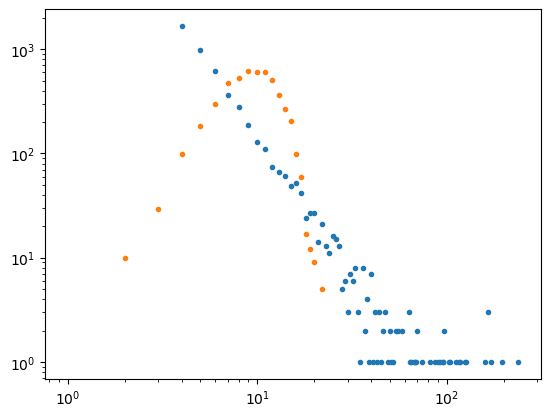

In [6]:
G1 = nx.barabasi_albert_graph(5000,4)
G2 = nx.gnp_random_graph(5000, 0.002)

h1 = nx.degree_histogram(G1)
h2 = nx.degree_histogram(G2)

plt.loglog(h1, '.')
plt.loglog(h2, '.')

3) Compute and compare the average clustering coefficients for the $G_{Np}$ and B-A graphs.

In [7]:
c1 = nx.average_clustering(G1)
c2 = nx.average_clustering(G2)

print(c1, c2)

0.010711981166740497 0.001938347838951556


### Task 2: Adjacency matrices and Numpy

1. An $N$-node star graph has $N-1$ nodes with degree $1$ and $1$ node with degree $N-1$. Use Numpy (and not NetworkX) to generate $\mathbf{\textrm{A}}_1$, the adjacency matrix for this graph. Number the nodes from $0$ to $N-1$ with node $0$ corresponding to the central high-degree node. You should avoid using loops for this task if you can. An example with $N=8$:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Star_network_7.svg/180px-Star_network_7.svg.png">

In [8]:
N=6
#Add code here (code should work for any sensible N)
M = np.full([N,N], 0)

for r in range(1, N):
    M[0, r] = 1
    M[r, 0] = 1

M

array([[0, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

2. Now consider a *closed* star graph where a "ring" of links is placed around an ordinary star graph. Then, the  graph will have $1$ node with degree $N-1$ and $N-1$ nodes with degree $3$. Use Numpy to create $\mathbf{\textrm{A}}_2$, the adjacency matrix for this graph. The function *np.diag* may be helpful.

In [9]:
N=6

A2 = np.full([N,N], 0)

for r in range(1, N-1):
    A2[0, r] = 1
    A2[r, 0] = 1
    A2[r - 1, r] = 1
    A2[r + 1, r] = 1
    
A2[0, N-1] = 1
A2[N-1, 0] = 1
A2[N-2, N-1] = 1
A2[1, N-1] = 1
A2[N-1, 1] = 1

A2

array([[0, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 1, 0]])

3. Verify that $\rm (\mathbf{A}_2+\mathbf{I})(\mathbf{A}_2+\mathbf{I})^{-1} = \mathbf{I}$

In [10]:
print(np.matmul(np.linalg.inv((A2 + np.identity(6))), A2 + np.identity(6)))

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


4. Finally, use NetworkX to convert $\mathbf{\textrm{A}}_2$ into a NetworkX graph, and then display the graph 

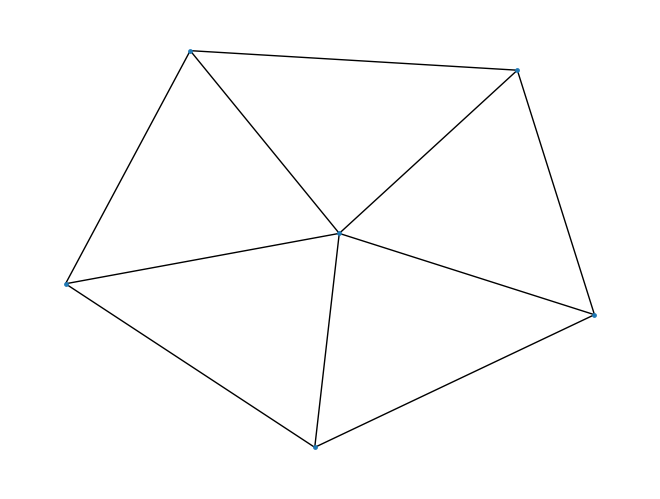

In [11]:
G = nx.from_numpy_matrix(A2)

nx.draw(G, node_size = 6)